In [55]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import datasets

In [56]:
def unit_step_function(x):
    return np.sign(x)
    

class Perceptron:
    def __init__(self, learning_rate = 0.01, n_iters = 1000)->None:
        self.lr = learning_rate
        self.n_iters = n_iters
        self.activation_func = unit_step_function
        self.weights = None
        self.bias = None
        
    def fit(self, X, y):
        print(X.shape)
        X = np.insert(X, 0, 1, axis = 1)
        print(X.shape)
        n_samples, n_features = X.shape
        
        self.weights = np.random.rand(n_features)
        self.weights[0] = 0
        
        y_ = np.where(y >= 0, 1, -1)
        
        # learn weights
        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights)
                y_predicted = self.activation_func(linear_output)
                update = self.lr * (y_[idx] - y_predicted)
                self.weights += update * x_i
        
    def predict(self, X):
        X = np.insert(X, 0, 1, axis = 1)
        linear_output = np.dot(X, self.weights)
        y_predicted = self.activation_func(linear_output)
        return y_predicted

In [57]:
def accuracy(y_true, y_pred):
    np.sum(y_true==y_pred)/len(y_true)
    return accuracy

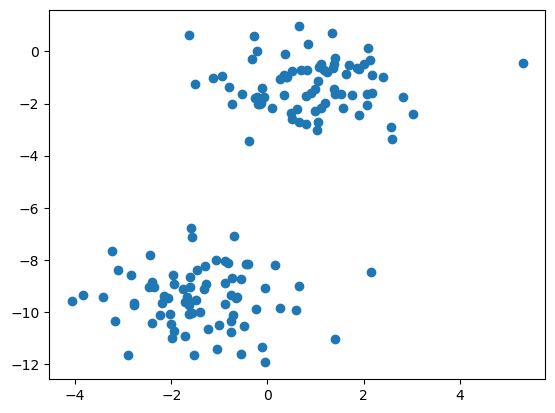

In [58]:
X, y  = datasets.make_blobs(n_samples=150, n_features=2, centers=2, \
    cluster_std=1.05, random_state=2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=2, random_state=123)

plt.scatter(X[:,0], X[:,1])

In [59]:
p = Perceptron(learning_rate=0.01, n_iters=1000)
p.fit(X_train, y_train)
predictions = p.predict(X_test)

(148, 2)
(148, 3)


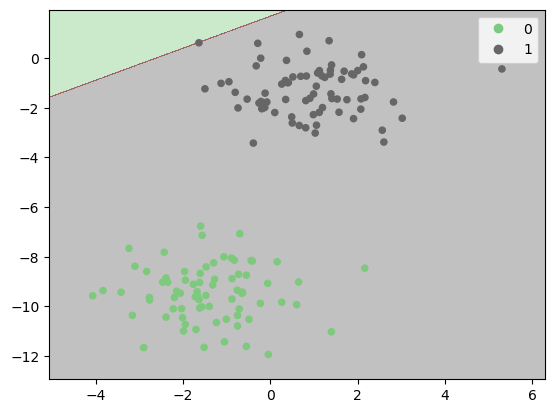

In [61]:
x0_min, x0_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x1_min, x1_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = 0.01

xx0, xx1 = np.meshgrid(np.arange(x0_min, x0_max, h), np.arange(x1_min, x1_max, h))

X_new = np.c_[xx0.ravel(), xx1.ravel()]
pred = p.predict(X_new)
plt.contourf(xx0, xx1, pred.reshape(xx0.shape), cmap=plt.cm.Accent, alpha=0.4)
scatter = plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Accent, s=20)
plt.xlim(xx0.min(), xx0.max())
plt.ylim(xx1.min(), xx1.max())
plt.legend(*scatter.legend_elements())
plt.show()

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (5,) + inhomogeneous part.

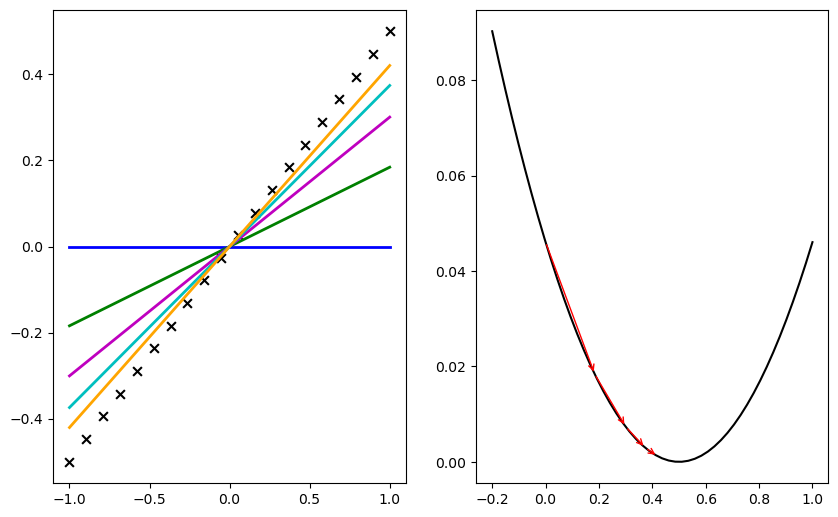

In [63]:
import numpy as np
import matplotlib.pyplot as plt

# The data to fit
m = 20
theta1_true = 0.5
x = np.linspace(-1,1,m)
y = theta1_true * x

# The plot: LHS is the data, RHS will be the cost function.
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,6.15))
ax[0].scatter(x, y, marker='x', s=40, color='k')

def cost_func(theta1):
    """The cost function, J(theta1) describing the goodness of fit."""
    theta1 = np.atleast_2d(np.asarray(theta1))
    return np.average((y-hypothesis(x, theta1))**2, axis=1)/2

def hypothesis(x, theta1):
    """Our "hypothesis function", a straight line through the origin."""
    return theta1*x

# First construct a grid of theta1 parameter pairs and their corresponding
# cost function values.
theta1_grid = np.linspace(-0.2,1,50)
J_grid = cost_func(theta1_grid[:,np.newaxis])

# The cost function as a function of its single parameter, theta1.
ax[1].plot(theta1_grid, J_grid, 'k')

# Take N steps with learning rate alpha down the steepest gradient,
# starting at theta1 = 0.
N = 5
alpha = 1
theta1 = [0]
J = [cost_func(theta1[0])[0]]
for j in range(N-1):
    last_theta1 = theta1[-1]
    this_theta1 = last_theta1 - alpha / m * np.sum(
                                    (hypothesis(x, last_theta1) - y) * x)
    theta1.append(this_theta1)
    J.append(cost_func(this_theta1))

# Annotate the cost function plot with coloured points indicating the
# parameters chosen and red arrows indicating the steps down the gradient.
# Also plot the fit function on the LHS data plot in a matching colour.
colors = ['b', 'g', 'm', 'c', 'orange']
ax[0].plot(x, hypothesis(x, theta1[0]), color=colors[0], lw=2,
           label=r'$\theta_1 = {:.3f}$'.format(theta1[0]))
for j in range(1,N):
    ax[1].annotate('', xy=(theta1[j], J[j]), xytext=(theta1[j-1], J[j-1]),
                   arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1},
                   va='center', ha='center')
    ax[0].plot(x, hypothesis(x, theta1[j]), color=colors[j], lw=2,
               label=r'$\theta_1 = {:.3f}$'.format(theta1[j]))

# Labels, titles and a legend.
ax[1].scatter(theta1, J, c=colors, s=40, lw=0)
ax[1].set_xlim(-0.2,1)
ax[1].set_xlabel(r'$\theta_1$')
ax[1].set_ylabel(r'$J(\theta_1)$')
ax[1].set_title('Cost function')
ax[0].set_xlabel(r'$x$')
ax[0].set_ylabel(r'$y$')
ax[0].set_title('Data and fit')
ax[0].legend(loc='upper left', fontsize='small')

plt.tight_layout()
plt.show()

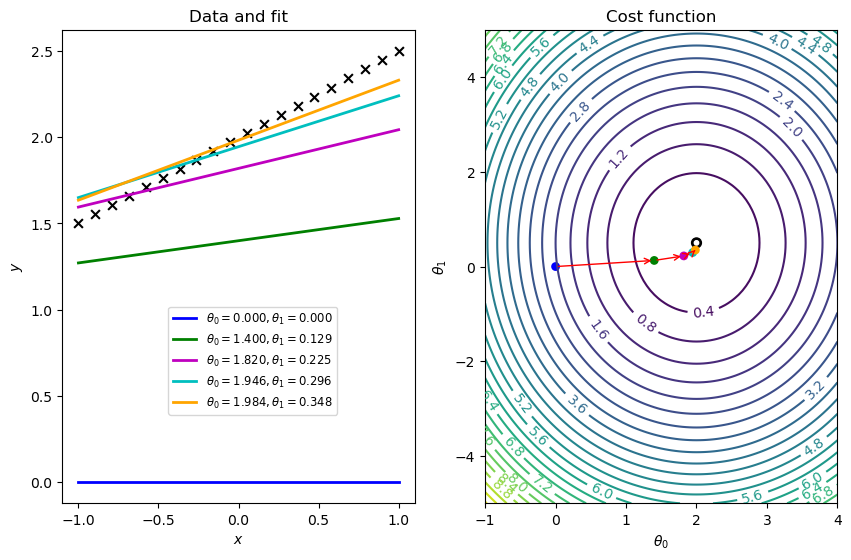

In [65]:
import numpy as np
import matplotlib.pyplot as plt

# The data to fit
m = 20
theta0_true = 2
theta1_true = 0.5
x = np.linspace(-1,1,m)
y = theta0_true + theta1_true * x

# The plot: LHS is the data, RHS will be the cost function.
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,6.15))
ax[0].scatter(x, y, marker='x', s=40, color='k')

def cost_func(theta0, theta1):
    """The cost function, J(theta0, theta1) describing the goodness of fit."""
    theta0 = np.atleast_3d(np.asarray(theta0))
    theta1 = np.atleast_3d(np.asarray(theta1))
    return np.average((y-hypothesis(x, theta0, theta1))**2, axis=2)/2

def hypothesis(x, theta0, theta1):
    """Our "hypothesis function", a straight line."""
    return theta0 + theta1*x

# First construct a grid of (theta0, theta1) parameter pairs and their
# corresponding cost function values.
theta0_grid = np.linspace(-1,4,101)
theta1_grid = np.linspace(-5,5,101)
J_grid = cost_func(theta0_grid[np.newaxis,:,np.newaxis],
                   theta1_grid[:,np.newaxis,np.newaxis])

# A labeled contour plot for the RHS cost function
X, Y = np.meshgrid(theta0_grid, theta1_grid)
contours = ax[1].contour(X, Y, J_grid, 30)
ax[1].clabel(contours)
# The target parameter values indicated on the cost function contour plot
ax[1].scatter([theta0_true]*2,[theta1_true]*2,s=[50,10], color=['k','w'])

# Take N steps with learning rate alpha down the steepest gradient,
# starting at (theta0, theta1) = (0, 0).
N = 5
alpha = 0.7
theta = [np.array((0,0))]
J = [cost_func(*theta[0])[0]]
for j in range(N-1):
    last_theta = theta[-1]
    this_theta = np.empty((2,))
    this_theta[0] = last_theta[0] - alpha / m * np.sum(
                                    (hypothesis(x, *last_theta) - y))
    this_theta[1] = last_theta[1] - alpha / m * np.sum(
                                    (hypothesis(x, *last_theta) - y) * x)
    theta.append(this_theta)
    J.append(cost_func(*this_theta))


# Annotate the cost function plot with coloured points indicating the
# parameters chosen and red arrows indicating the steps down the gradient.
# Also plot the fit function on the LHS data plot in a matching colour.
colors = ['b', 'g', 'm', 'c', 'orange']
ax[0].plot(x, hypothesis(x, *theta[0]), color=colors[0], lw=2,
           label=r'$\theta_0 = {:.3f}, \theta_1 = {:.3f}$'.format(*theta[0]))
for j in range(1,N):
    ax[1].annotate('', xy=theta[j], xytext=theta[j-1],
                   arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1},
                   va='center', ha='center')
    ax[0].plot(x, hypothesis(x, *theta[j]), color=colors[j], lw=2,
           label=r'$\theta_0 = {:.3f}, \theta_1 = {:.3f}$'.format(*theta[j]))
ax[1].scatter(*zip(*theta), c=colors, s=40, lw=0)

# Labels, titles and a legend.
ax[1].set_xlabel(r'$\theta_0$')
ax[1].set_ylabel(r'$\theta_1$')
ax[1].set_title('Cost function')
ax[0].set_xlabel(r'$x$')
ax[0].set_ylabel(r'$y$')
ax[0].set_title('Data and fit')
axbox = ax[0].get_position()
# Position the legend by hand so that it doesn't cover up any of the lines.
ax[0].legend(loc=(axbox.x0+0.5*axbox.width, axbox.y0+0.1*axbox.height),
             fontsize='small')

plt.show()

# Code (Python)
### The following block of code loads dependencies, defines the loss function and does plots the loss function (surface and contour plots):

In [72]:
# A. Dependencies 
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator

plot_scale = 1.25
plt.rcParams["figure.figsize"] = (plot_scale*16, plot_scale*9)

import numpy as np
import pandas as pd
import random
import scipy.stats
from itertools import product
import os
import time
from math import sqrt
import seaborn as sns; sns.set()
from tqdm import tqdm as tqdm       
import datetime
from typing import Tuple
class Vector: pass
from scipy.stats import norm
import torch
from torch import nn
from torch.utils.data import DataLoader
import copy
import matplotlib.ticker as mtick
from torchcontrib.optim import SWA
from numpy import linalg as LA
import imageio as io #create gif

# B. Create OLS problem
b0 = -2.0 #intercept
b1 = 2.0 #slope
beta_true = (b0 , b1)
nb_vals = 1000 #number draws

mu, sigma = 0, 0.001 # mean and standard deviation
shocks = np.random.normal(mu, sigma, nb_vals)

# covariate
x0 = np.ones(nb_vals) #cst
x1 = np.random.uniform(-5, 5, nb_vals)
X = np.column_stack((x0, x1))

# Data
y = b0*x0 + b1*x1 + shocks

A = np.linalg.inv(np.matmul(np.transpose(X), X))
B = np.matmul(np.transpose(X), y)
np.matmul(A, B)

X_torch = torch.from_numpy(X).float()
y_torch = torch.from_numpy(y).float()

# Loss function and gradient (for plotting)
def loss_function_OLS(beta_hat, X, y):
    loss = (1/len(y))*np.sum(np.square(y - np.matmul(X, beta_hat)))
    return loss

def grad_OLS(beta_hat, X, y):
    mse = loss_function_OLS(beta_hat, X, y)
    G = (2/len(y))*np.matmul(np.transpose(X), np.matmul(X, beta_hat) - y) 
    return G, mse

# C. Plots for the loss function
min_val=-10.0
max_val=10.0

delta_grid=0.05
x_grid = np.arange(min_val, max_val, delta_grid)
y_grid = np.arange(min_val, max_val, delta_grid)
X_grid, Y_grid = np.meshgrid(x_grid, y_grid)

Z = np.zeros((len(x_grid), len(y_grid)))

for (y_index, y_value) in enumerate(y_grid):
    for (x_index, x_value) in enumerate(x_grid):
        beta_local = np.array((x_value, y_value))
        Z[y_index, x_index] = loss_function_OLS(beta_local, X, y)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Plot the surface.
surf = ax.plot_surface(X_grid, Y_grid, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False, alpha=0.2)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter('{x:.02f}')

ax.scatter([b0], [b1], [true_value], s=100, c='black', linewidth=0.5)

x_min = -10
x_max = -x_min
y_min = x_min
y_max = -x_min

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.ylabel('Slope')
plt.xlabel('Intercept')

fig.colorbar(surf, shrink=0.5, aspect=5)

filename = "IMGS/surface_loss.png"
plt.savefig(filename)
plt.show()

# Plot contour
cp = plt.contour(X_grid, Y_grid, np.sqrt(Z), colors='black', linestyles='dashed', linewidths=1, alpha=0.5)
plt.clabel(cp, inline=1, fontsize=10)
cp = plt.contourf(X_grid, Y_grid, np.sqrt(Z))
plt.scatter([b0], [b1], s=100, c='white', linewidth=0.5)
plt.ylabel('Slope')
plt.xlabel('Intercept')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

filename = "IMGS/countour_loss.png"
plt.savefig(filename)
plt.show()


ModuleNotFoundError: No module named 'torch'

In [67]:
def loss_OLS(model, y, X): 
    """
    Loss function for OLS
    """
    R_squared = torch.square(y.unsqueeze(1) - model(X[:,1].unsqueeze(1)))
    return torch.mean(R_squared)

def set_initial_values(model, w, b):
    """
    Function to set the weight and bias to certain values
    """
    with torch.no_grad():
        for name, param in model.named_parameters():
            if 'linear_relu_stack.0.weight' in name:
                param.copy_(torch.tensor([w]))
            elif 'linear_relu_stack.0.bias' in name:
                param.copy_(torch.tensor([b]))
    
def create_optimizer(model, optimizer_name, lr, momentum):
    """
    Function to define an optimizer
    """
    if optimizer_name == "Adam":
        optimizer = torch.optim.Adam(model.parameters(), lr) 
    elif optimizer_name == "SGD":
        optimizer = torch.optim.SGD(model.parameters(), lr)
    elif optimizer_name == "SGD-momentum":
        optimizer = torch.optim.SGD(model.parameters(), lr, momentum)
    elif optimizer_name == "Adadelta":
        optimizer = torch.optim.Adadelta(model.parameters(), lr)
    elif optimizer_name == "RMSprop":
        optimizer = torch.optim.RMSprop(model.parameters(), lr)
    else:
        raise("optimizer unknown")
    return optimizer

def train_model(optimizer_name, initial_guess, true_value, lr, momentum):
    """
    Function to train a model
    """
    # initialize a model
    model = NeuralNetwork().to(device)
    #print(model)

    set_initial_values(model, initial_guess[0], initial_guess[1])

    for name, param in model.named_parameters():
        print(name, param)

    model.train()

    nb_epochs = 100
    use_scheduler = False
    freq_scheduler = 100
    freq_gamma = 0.95
    true_b = torch.tensor([true_value[0], true_value[1]])

    print(optimizer_name)
    optimizer = create_optimizer(model, optimizer_name, lr, momentum)

    # A LOOP OVER EACH POINT OF THE CURRENT GRID
    # store mean loss by epoch
    scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=freq_gamma)
    loss_epochs = torch.zeros(nb_epochs)
    list_perc_abs_error = [] #store abs value percentage error
    list_perc_abs_error_i = [] #store index i
    list_perc_abs_error_loss = [] #store loss
    list_norm_gradient = [] #store norm of gradient
    list_gradient = [] #store the gradient itself
    list_beta = [] #store parameters

    calculate_variance_grad = False 

    freq_loss = 1
    freq_display = 10

    for i in tqdm(range(0, nb_epochs)):

        optimizer.zero_grad()

        # Calculate the loss
        loss = loss_OLS(model, y_torch, X_torch)
        loss_epochs[[i]] = float(loss.item())

        # Store the loss
        with torch.no_grad():
            # Extract weight and bias
            b_current = np.array([k.item() for k in model.parameters()])
            b_current_ordered = np.array((b_current[1], b_current[0])) #reorder (bias, weight)
        list_beta.append(b_current_ordered)
        perc_abs_error = np.sum(np.square(b_current_ordered - true_b.detach().numpy()))
        list_perc_abs_error.append(np.median(perc_abs_error))
        list_perc_abs_error_i.append(i)
        list_perc_abs_error_loss.append(float(loss.item()))

        # Calculate the gradient
        loss.backward()

        # Store the gradient
        with torch.no_grad():
            grad = np.zeros(2)
            for (index_p, p) in enumerate(model.parameters()):
                grad[index_p] = p.grad.detach().data
            #reorder (bias, weight)
            grad_ordered = np.array((grad[1], grad[0]))
            list_gradient.append(grad_ordered)

        # Take a gradient steps
        optimizer.step()

        if i % freq_display == 0: #Monitor the loss
            loss, current = float(loss.item()), i
            print(f"loss: {loss:>7f}, percentage abs. error {list_perc_abs_error[-1]:>7f}, [{current:>5d}/{nb_epochs:>5d}]")
        if (i % freq_scheduler == 0) & (i != 0) & (use_scheduler == True):
            scheduler.step()
            print("i : {}. Decreasing learning rate: {}".format(i, scheduler.get_last_lr()))

    return model, list_beta, list_gradient 

def create_gif(filenames, output_name):
    """
    Function to create a gif, using a list of images
    """
    with io.get_writer(output_name, mode='I') as writer:
        for filename in filenames:
            image = io.imread(filename)
            writer.append_data(image)

    # Remove files, except the final one
    for index_file, filename in enumerate(set(filenames)):
        if index_file < len(filenames) - 1:
            os.remove(filename)
        
# Define a neural network with a single node  
# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

nb_nodes = 1
# Define model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(1, nb_nodes)
        )

    def forward(self, x):
        out = self.linear_relu_stack(x)
        return out


ModuleNotFoundError: No module named 'torch'

# Minimization using gradient descent:

In [68]:
lr = 0.10 #learning rate
alpha = lr
init = (9.0, 2.0) #initial guess
true_value = [-2.0, 2.0] #true value for parameters

# I. Solve
optimizer_name = "SGD"
momentum = 0.0
model_SGD, list_beta_SGD, list_gradient_SGD = train_model(optimizer_name , init, true_value, lr, momentum)

# II. Create gif
filenames = []
zoom=1 #to increase/decrease the length of vectors on the plot
max_index_plot = 30 #when to stop plotting

# Plot contour
cp = plt.contour(X_grid, Y_grid, np.sqrt(Z), colors='black', linestyles='dashed', linewidths=1, alpha=0.5)
plt.clabel(cp, inline=1, fontsize=10)
cp = plt.contourf(X_grid, Y_grid, np.sqrt(Z))

# Add points and arrows
for (index, (bb, grad)) in enumerate(zip(list_beta_SGD, list_gradient_SGD)):
    if index>max_index_plot:
        break
    if index == 0:
        label_1 = "SGD"
    else:
        label_1 = ""
    # Point
    plt.scatter([bb[0]], [bb[1]], s=10, c='white', linewidth=5.0, label=label_1)
    # Arrows
    plt.arrow(bb[0], bb[1], - zoom * alpha* grad[0], - zoom * alpha * grad[1], color='white')
    # Add arrows for gradient:
    # create file name and append it to a list
    filename = "IMGS/path_SGD_{}.png".format(index)
    filenames.append(filename)
    plt.xlabel('cst')
    plt.ylabel('slope')
    plt.legend()
    plt.savefig(filename)

filename = "IMGS/path_SGD.png"
plt.savefig(filename)
create_gif(filenames, "SGD.gif")
plt.show()

NameError: name 'NeuralNetwork' is not defined

# Minimization using gradient descent with momentum:

In [69]:
optimizer_name = "SGD-momentum"
momentum = 0.2

# I. Solve
model_momentum, list_beta_momentum, list_gradient_momentum = train_model(optimizer_name , init, true_value, lr, momentum)

# II. Create gif
filenames = []
zoom=1 #to increase/decrease the length of vectors on the plot
max_index_plot = 30 #when to stop plotting

# Plot contour
cp = plt.contour(X_grid, Y_grid, np.sqrt(Z), colors='black', linestyles='dashed', linewidths=1, alpha=0.5)
plt.clabel(cp, inline=1, fontsize=10)
cp = plt.contourf(X_grid, Y_grid, np.sqrt(Z))

# Add points and arrows
for (index, (bb, grad, bb_momentum, grad_momentum)) in enumerate(zip(list_beta_SGD, list_gradient_SGD, list_beta_momentum, list_gradient_momentum)):
    if index>max_index_plot:
        break
    if index == 0:
        label_1 = "SGD"
        label_2 = "SGD-momentum"
    else:
        label_1 = ""
        label_2 = ""
    # Point
    plt.scatter([bb[0]], [bb[1]], s=10, c='white', linewidth=5.0, label=label_1)
    plt.scatter([bb_momentum[0]], [bb_momentum[1]], s=10, c='blue', linewidth=5.0, alpha=0.5, label=label_2)
    # Arrows
    #plt.arrow(bb_momentum[0], bb_momentum[1], - zoom * alpha* grad[0], - zoom * alpha * grad[1], color='white')
    plt.arrow(bb_momentum[0], bb_momentum[1], - zoom * alpha* grad_momentum[0], - zoom * alpha * grad_momentum[1], color="blue")
    # create file name and append it to a list
    filename = "IMGS/path_SGD_momentum_{}.png".format(index)
    filenames.append(filename)
    plt.xlabel('cst')
    plt.ylabel('slope')
    plt.legend()
    plt.savefig(filename)

filename = "IMGS/path_SGD_momentum.png"
plt.savefig(filename)
create_gif(filenames, "SGD_momentum.gif")
plt.show()


NameError: name 'NeuralNetwork' is not defined

# Minimization using RMSprop:

In [70]:
optimizer_name = "RMSprop"
momentum = 0.0
# I. Solve
model_RMSprop, list_beta_RMSprop, list_gradient_RMSprop = train_model(optimizer_name , init, true_value, lr, momentum)

# II. Create gif
filenames = []
zoom=1 #to increase/decrease the length of vectors on the plot
max_index_plot = 30 #when to stop plotting

# Plot contour
cp = plt.contour(X_grid, Y_grid, np.sqrt(Z), colors='black', linestyles='dashed', linewidths=1, alpha=0.5)
plt.clabel(cp, inline=1, fontsize=10)
cp = plt.contourf(X_grid, Y_grid, np.sqrt(Z))

# Add points and arrows
for (index, (bb, grad, bb_RMSprop, grad_RMSprop)) in enumerate(zip(list_beta_SGD, list_gradient_SGD, list_beta_RMSprop, list_gradient_RMSprop)):
    if index>max_index_plot:
        break
    if index == 0:
        label_1 = "SGD"
        label_2 = "RMSprop"
    else:
        label_1 = ""
        label_2 = ""
    # Point
    plt.scatter([bb[0]], [bb[1]], s=10, c='white', linewidth=5.0, label=label_1)
    plt.scatter([bb_RMSprop[0]], [bb_RMSprop[1]], s=10, c='blue', linewidth=5.0, alpha=0.5, label=label_2)
    # Arrows
    plt.arrow(bb_RMSprop[0], bb_RMSprop[1], - zoom * alpha* grad_RMSprop[0], - zoom * alpha * grad_RMSprop[1], color="blue")
    # create file name and append it to a list
    filename = "IMGS/path_RMSprop_{}.png".format(index)
    filenames.append(filename)
    plt.xlabel('cst')
    plt.ylabel('slope')
    plt.legend()
    plt.savefig(filename)

filename = "IMGS/path_RMSprop.png"
plt.savefig(filename)
create_gif(filenames, "RMSprop.gif")
plt.show()


NameError: name 'NeuralNetwork' is not defined

# Minimization using Adam:

In [71]:
optimizer_name = "Adam"
momentum = 0.0

# I. Solve
model_Adam, list_beta_Adam, list_gradient_Adam = train_model(optimizer_name , init, true_value, lr, momentum)

# II. Create gif
filenames = []
zoom=1 #to increase/decrease the length of vectors on the plot
max_index_plot = 30 #when to stop plotting

# Plot contour
cp = plt.contour(X_grid, Y_grid, np.sqrt(Z), colors='black', linestyles='dashed', linewidths=1, alpha=0.5)
plt.clabel(cp, inline=1, fontsize=10)
cp = plt.contourf(X_grid, Y_grid, np.sqrt(Z))

# Add points and arrows
for (index, (bb, grad, bb_Adam, grad_Adam)) in enumerate(zip(list_beta_SGD, list_gradient_SGD, list_beta_Adam, list_gradient_Adam)):
    if index>max_index_plot:
        break
    if index == 0:
        label_1 = "SGD"
        label_2 = "Adam"
    else:
        label_1 = ""
        label_2 = ""
    # Point
    plt.scatter([bb[0]], [bb[1]], s=10, c='white', linewidth=5.0, label=label_1)
    plt.scatter([bb_Adam[0]], [bb_Adam[1]], s=10, c='blue', linewidth=5.0, alpha=0.5, label=label_2)
    # Arrows
    plt.arrow(bb_Adam[0], bb_Adam[1], - zoom * alpha* grad_Adam[0], - zoom * alpha * grad_Adam[1], color="blue")
    # create file name and append it to a list
    filename = "IMGS/path_Adam_{}.png".format(index)
    filenames.append(filename)
    plt.xlabel('cst')
    plt.ylabel('slope')
    plt.legend()
    plt.savefig(filename)

filename = "IMGS/path_Adam.png"
plt.savefig(filename)
create_gif(filenames, "Adam.gif")
plt.show()


NameError: name 'NeuralNetwork' is not defined

# Creating the “Master plot” with the four trajectories together:

In [ ]:
max_iter = 100
filenames = []
cp = plt.contour(X_grid, Y_grid, np.sqrt(Z), colors='black', linestyles='dashed', linewidths=1, alpha=0.5)
plt.clabel(cp, inline=1, fontsize=10)
cp = plt.contourf(X_grid, Y_grid, np.sqrt(Z))
colors = ["white", "blue", "green", "red"]

# Add points:
for (index, (bb_SGD, bb_momentum, bb_RMSprop, bb_Adam)) in enumerate(zip(list_beta_SGD, list_beta_momentum, list_beta_RMSprop, list_beta_Adam)):
    if index % freq_plot == 0:
        if index == 0:
            label_1 = "SGD"
            label_2 = "SGD-momentum"
            label_3 = "RMSprop"
            label_4 = "Adam"
        else:
            label_1, label_2, label_3, label_4 = "", "", "", ""
        plt.scatter([bb_SGD[0]], [bb_SGD[1]], s=10, linewidth=5.0, label=label_1, color=colors[0])
        plt.scatter([bb_momentum[0]], [bb_momentum[1]], s=10, linewidth=5.0, alpha=0.5, label=label_2, color=colors[1])
        plt.scatter([bb_RMSprop[0]], [bb_RMSprop[1]], s=10, linewidth=5.0, alpha=0.5, label=label_3, color=colors[2])
        plt.scatter([bb_Adam[0]], [bb_Adam[1]], s=10, linewidth=5.0, alpha=0.5, label=label_4, color=colors[3])
    if index > max_iter:
        break
    # create file name and append it to a list
    filename = "IMGS/img_{}.png".format(index)
    filenames.append(filename)
    # Add arrows for gradient:
    plt.xlabel('cst')
    plt.ylabel('slope')
    plt.legend()

    # save frame
    plt.savefig(filename)
    #plt.close()# build gif
    
create_gif(filenames, "compare_optim_algos.gif")


# Creating the 3D “Master plot”:

In [ ]:
max_iter = 100
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Plot the surface.
surf = ax.plot_surface(X_grid, Y_grid, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False, alpha=0.1)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter('{x:.02f}')
ax.view_init(60, 35)

colors = ["black", "blue", "green", "red"]
x_min = -10
x_max = -x_min
y_min = x_min
y_max = -x_min

# Add points:
for (index, (bb_SGD, bb_momentum, bb_RMSprop, bb_Adam)) in enumerate(zip(list_beta_SGD, list_beta_momentum, list_beta_RMSprop, list_beta_Adam)):
    if index == 0:
        label_1 = "SGD"
        label_2 = "SGD-momentum"
        label_3 = "RMSprop"
        label_4 = "Adam"
    else:
        label_1, label_2, label_3, label_4 = "", "", "", ""
    ax.scatter([bb_SGD[0]], [bb_SGD[1]], s=100, linewidth=5.0, label=label_1, color=colors[0])
    ax.scatter([bb_momentum[0]], [bb_momentum[1]], s=100, linewidth=5.0, alpha=0.5, label=label_2, color=colors[1])
    ax.scatter([bb_RMSprop[0]], [bb_RMSprop[1]], s=100, linewidth=5.0, alpha=0.5, label=label_3, color=colors[2])
    ax.scatter([bb_Adam[0]], [bb_Adam[1]], s=100, linewidth=5.0, alpha=0.5, label=label_4, color=colors[3])
    if index > max_iter:
        break
    # create file name and append it to a list
    filename = "IMGS/img_{}.png".format(index)
    filenames.append(filename)
    # Add arrows for gradient:
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.ylabel('Slope')
    plt.xlabel('Intercept')
    plt.legend()
    # save frame
    plt.savefig(filename)

filename = "IMGS/surface_loss.png"
plt.savefig(filename)
plt.show()

create_gif(filenames, "surface_compare_optim_algos.gif")
